# Load Data

In [235]:
from pathlib import Path

while Path.cwd().name != 'language-model-toxicity':
    %cd ..

%matplotlib inline  

In [236]:
import pandas as pd
import seaborn as sns
sns.set(context="paper", style="white", font_scale=1.5, palette="RdBu") 
from tqdm.notebook import trange, tqdm
from spacy.tokenizer import Tokenizer
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas("progress")
from nltk.stem.porter import *
import spacy

In [565]:
with open('wt_toxicities.txt', 'r') as f:
    wt_maxes = [float(x.strip()) for x in f.readlines()]
    

In [566]:
with open('owtc_toxicities.txt', 'r') as f:
    owtc_maxes = [float(x.strip()) for x in f.readlines()]
    

In [597]:
bc = pd.read_json("bookscorpus_random_100k_with_scores.jsonl", lines=True)
bc_maxes = bc.toxicity.tolist()

In [598]:
bc.loc[bc.toxicity >=0.5][['text', 'toxicity']].sample(1).values[0]

array(['"Go f**king crawl back into a bottle and leave me alone." He moved to stride past Shock and resume work. No time for this stupid chitchat anyway.',
       0.93193424], dtype=object)

In [599]:
len([x for x in bc_maxes if x >= 0.5]) / len(bc_maxes)

0.09103903686255561

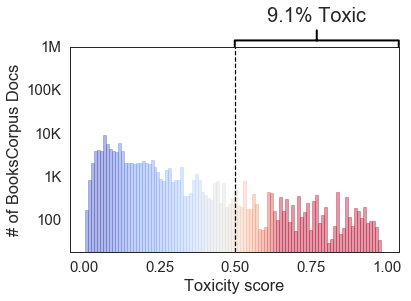

In [601]:
sns.set(context="paper", style="white", font_scale=1.7) 

ax = sns.distplot(bc_maxes, bins=100, kde=False)

bc_maxes.sort()
vals = np.array([max(bc_maxes[item:item+100]) for item in range(0, len(bc_maxes), len(bc_maxes) // 100)])
norm = plt.Normalize(0.04, 0.20)
colors = plt.cm.coolwarm(norm(vals))

for rec, col in zip(ax.patches, colors):
    rec.set_color(col)

ax.set_xlabel("Toxicity score")
ax.set_ylabel("# of BooksCorpus Docs")
ax.set_yscale('log')

plt.axvline(0.5,0,10000000)
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("black")

ax.set_xticks([0, 0.25, 0.50, 0.75,1.0])
ax.set_yticks([10, 100, 1000, 10000,100000, 1000000])
ax.set_ylim([0,1000000])
ax.set_yticklabels(["10", "100", "1K", "10K", "100K",  "1M"])
ax.annotate('9.1% Toxic', xy=(0.75, 1.02), xytext=(0.75, 1.1), xycoords='axes fraction', 
            fontsize=20, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=4.1, lengthB=0.3', lw=2.0, color='black'))
plt.tight_layout()


plt.savefig("toxicity_bookscorpus.pdf", dpi=300, bbox_inches="tight")


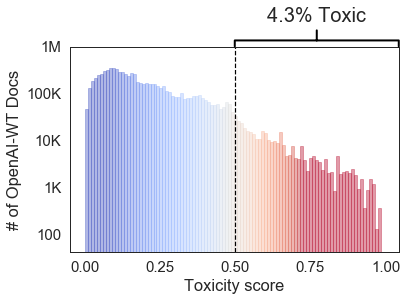

In [567]:
sns.set(context="paper", style="white", font_scale=1.7) 

ax = sns.distplot(wt_maxes, bins=100, kde=False)

wt_maxes.sort()
vals = np.array([max(wt_maxes[item:item+100]) for item in range(0, len(wt_maxes), len(wt_maxes) // 100)])
norm = plt.Normalize(0.04, 0.26)
colors = plt.cm.coolwarm(norm(vals))

for rec, col in zip(ax.patches, colors):
    rec.set_color(col)

ax.set_xlabel("Toxicity score")
ax.set_ylabel("# of OpenAI-WT Docs")
ax.set_yscale('log')

plt.axvline(0.5,0,10000000)
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("black")

ax.set_xticks([0, 0.25, 0.50, 0.75,1.0])
ax.set_yticks([10, 100, 1000, 10000,100000, 1000000])
ax.set_ylim([0,1000000])
ax.set_yticklabels(["10", "100", "1K", "10K", "100K",  "1M"])
ax.annotate('4.3% Toxic', xy=(0.75, 1.02), xytext=(0.75, 1.1), xycoords='axes fraction', 
            fontsize=20, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=4.1, lengthB=0.3', lw=2.0, color='black'))
plt.tight_layout()


plt.savefig("toxicity_wt.pdf", dpi=300, bbox_inches="tight")


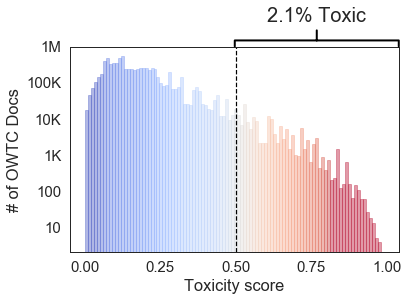

In [568]:
sns.set(context="paper", style="white", font_scale=1.7) 

ax = sns.distplot(owtc_maxes, bins=100, kde=False)

owtc_maxes.sort()
vals = np.array([max(owtc_maxes[item:item+100]) for item in range(0, len(owtc_maxes), len(owtc_maxes) // 100)])
norm = plt.Normalize(0.04, 0.26)
colors = plt.cm.coolwarm(norm(vals))

for rec, col in zip(ax.patches, colors):
    rec.set_color(col)

ax.set_xlabel("Toxicity score")
ax.set_ylabel("# of OWTC Docs")
ax.set_yscale('log')

plt.axvline(0.5,0,10000000)
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("black")

ax.set_xticks([0, 0.25, 0.50, 0.75,1.0])
ax.set_yticks([10, 100, 1000, 10000,100000, 1000000])
ax.set_ylim([0,1000000])
ax.set_yticklabels(["10", "100", "1K", "10K", "100K",  "1M"])
ax.annotate('2.1% Toxic', xy=(0.75, 1.02), xytext=(0.75, 1.1), xycoords='axes fraction', 
            fontsize=20, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=4.1, lengthB=0.3', lw=2.0, color='black'))
plt.tight_layout()


plt.savefig("toxicity_owtc.pdf", dpi=300, bbox_inches="tight")


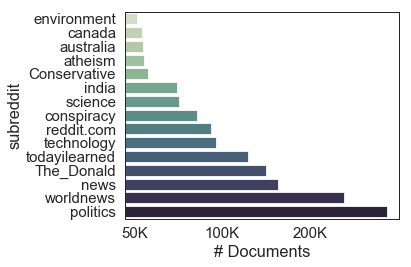

In [244]:
import matplotlib.ticker as mticker
sr = subreddits.subreddit.value_counts().head(n=15)
data = sr.reset_index()
data.columns = ['subreddit', '# Documents']
data = data.sort_values(by='# Documents', ascending=True)
ax = sns.barplot(data=data, x='# Documents', y='subreddit', palette=sns.cubehelix_palette(15, start=.5, rot=-.75, reverse=False))
ax.set_xscale('log')
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(mticker.NullFormatter())

# ax.set_xticks([])
# ax.set_xticklabels([])

ax.set_xticks([50000, 100000,200000])
ax.set_xticklabels(["50K", "100K", "200K"])
plt.tight_layout()
plt.savefig("top_subreddits.pdf", dpi=300)

In [230]:
q['is_news'] = q.cat_labels_en.str.contains('news|News')

In [352]:
master_z.loc[master_z.is_toxic].fact.value_counts()

HIGH     151452
MIXED    133345
LOW       21274
Name: fact, dtype: int64

In [276]:
(133345 + 21274) / master_z.is_toxic.sum()

0.13365969030377478

In [14]:
subreddits = pd.read_csv("../owtc_subreddits.csv")

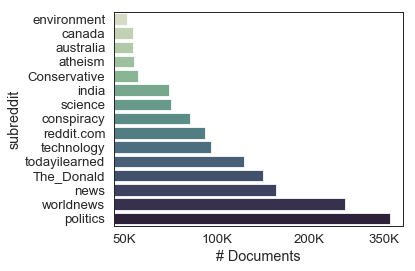

In [15]:
import matplotlib.ticker as mticker
sr = subreddits.subreddit.value_counts().head(n=15)
data = sr.reset_index()
data.columns = ['subreddit', '# Documents']
data = data.sort_values(by='# Documents', ascending=True)
ax = sns.barplot(data=data, x='# Documents', y='subreddit', palette=sns.cubehelix_palette(15, start=.5, rot=-.75, reverse=False))
ax.set_xscale('log')
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(mticker.NullFormatter())

# ax.set_xticks([])
# ax.set_xticklabels([])

ax.set_xticks([50000, 100000,200000, 350000])
ax.set_xticklabels(["50K", "100K", "200K", "350K"])
plt.tight_layout()
plt.savefig("subreddit.pdf", dpi=300)

In [16]:
import tldextract
tqdm.pandas()
extract = tldextract.TLDExtract()
subreddits['tld_extraction'] = subreddits.url.progress_apply(extract)

In [17]:
subreddits['domain'] = subreddits.tld_extraction.apply(lambda x: x.domain + "." + x.suffix)


In [18]:
site_bias = pd.read_csv("data/mbfc.csv")
site_bias['domain'] = site_bias['source_url_processed']
z = subreddits.merge(site_bias, how='left', on='domain')


In [19]:
with open("./data/domains.txt", 'r') as f:
    webtext_domains = [x.strip().split()[1] if len(x.split()) > 1 else None for x in f.readlines()]
    webtext_domains = [x for x in webtext_domains if x is not None]

In [20]:
site_bias['is_webtext'] = site_bias.domain.str.split('.').apply(lambda x: x[0]).isin(webtext_domains)

In [21]:
site_bias.loc[site_bias.is_webtext].fact.value_counts()

HIGH     128
MIXED     45
LOW        5
Name: fact, dtype: int64

In [22]:
urls = pd.read_csv("data/openwebtext-urls.csv")
master_z = z.merge(urls, how='left')

In [23]:
with open('data/toxic_documents.txt') as f:
    toxic_docs = [x.strip() for x in f.readlines()]
with open('data/toxic_documents_all_labels.txt') as f:
    toxic_docs_all = [x.strip() for x in f.readlines()]

In [24]:
len(toxic_docs_all)

1259558

In [25]:
toxic_z = master_z.loc[master_z.filename.isin(toxic_docs)]
master_z['is_toxic_only'] = master_z.filename.isin(toxic_docs)
master_z['is_toxic_all'] = master_z.filename.isin(toxic_docs_all)

In [371]:
toxic_z = toxic_z.dropna(subset=['subreddit'])

In [26]:
banned_subreddits = pd.read_csv("/Users/suching/Downloads/banned_subreddits - Sheet1 (1).csv")

In [27]:
quarantined_subreddits = pd.read_csv("/Users/suching/Downloads/banned_subreddits - quarantined (2).csv")

In [28]:
banned_subreddits = pd.concat([banned_subreddits, quarantined_subreddits], 0)

In [29]:
toxic_z['is_banned_or_quarantined'] = toxic_z.subreddit.isin(banned_subreddits.subreddit)
banned_z = toxic_z.loc[toxic_z.is_banned_or_quarantined].subreddit.value_counts().reset_index().head(n=15)
banned_z.columns = ['banned/quarantined subreddit', '# of Toxic Documents']
banned_z = banned_z.sort_values(by='# of Toxic Documents', ascending=True)


/Users/suching/.pyenv/versions/miniconda3-4.3.11/envs/allennlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df = pd.read_csv('prompts_maxGenToxicity_gt90_gpt1_gpt2_ctrl.csv')
adversarial_subreddits = master_z.loc[master_z.filename.isin(df.filename)]

In [50]:
adversarial_subreddits = df.merge(master_z, on='filename')

In [51]:
toxic_adv_prompts = adversarial_subreddits.loc[~adversarial_subreddits.toxicPrompt.astype(bool)]
toxic_adv_prompts.loc[toxic_adv_prompts.fact.isin(['LOW', 'MIXED']) | toxic_adv_prompts.is_quarantined].shape[0]

80

In [37]:
with open('data/dups.txt', 'r') as f:
    dups = [x.strip() +".txt" for x in f.readlines()]

In [58]:
master_z['is_dup'] = master_z.filename.isin(dups)

In [147]:
dup_z

(2267508, 16)

In [341]:
adversarial_subreddits.loc[(adversarial_subreddits.fact.isin(['LOW', 'MIXED']) | adversarial_subreddits.is_quarantined)].shape[0]

445

In [342]:
445 / adversarial_subreddits.shape[0]

0.20573277854831254

In [319]:
dup_z.shape[0]

2267508

In [334]:
toxic_dup_z.loc[toxic_dup_z.subreddit == 'The_Donald'].filename.sample(1)

3764552    0887524-71cfb5ac10f2e3b3c40811dbdf6a4026.txt
Name: filename, dtype: object

In [380]:
master_z.is_toxic_all.sum()

1156811

In [383]:
toxic_z.subreddit.isin(banned_subreddits.subreddit).sum()

9941

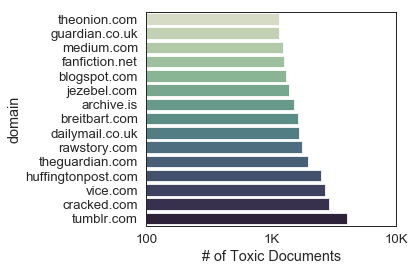

In [343]:
data = master_z.loc[master_z.is_toxic_only].domain.value_counts().reset_index().head(n=15)
data.columns = ['domain', '# of Toxic Documents']
data = data.sort_values(by='# of Toxic Documents', ascending=True)

ax = sns.barplot(data=data, y = 'domain', x ='# of Toxic Documents',palette=sns.cubehelix_palette(15, start=.5, rot=-.75, reverse=False))
ax.set_xscale('log')
ax.set_ylabel("domain")
ax.set_xticks([100, 1000, 10000])
ax.set_xticklabels(["100", "1K", "10K"])
plt.tight_layout()
plt.savefig("toxic_urls.pdf", dpi=300)

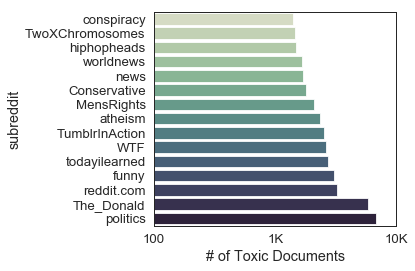

In [345]:
data = master_z.loc[master_z.is_toxic_only].subreddit.value_counts().reset_index().head(n=15)
data.columns = ['subreddit', '# of Toxic Documents']
data = data.sort_values(by='# of Toxic Documents', ascending=True)

ax = sns.barplot(data=data, y = 'subreddit', x ='# of Toxic Documents',palette=sns.cubehelix_palette(15, start=.5, rot=-.75, reverse=False))
ax.set_xscale('log')
ax.set_ylabel("subreddit")
ax.set_xticks([100, 1000, 10000])
ax.set_xticklabels(["100", "1K", "10K"])
plt.tight_layout()
plt.savefig("toxic_subreddits.pdf", dpi=300)

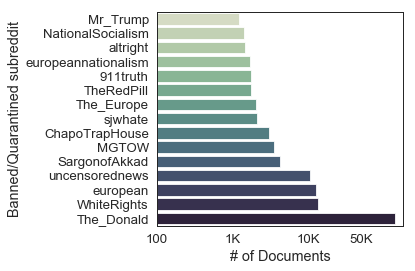

In [348]:
data = master_z.loc[master_z.is_quarantined].subreddit.value_counts().reset_index().head(n=15)
data.columns = ['subreddit', '# of Documents']
data = data.sort_values(by='# of Documents', ascending=True)

ax = sns.barplot(data=data, y = 'subreddit', x ='# of Documents',palette=sns.cubehelix_palette(15, start=.5, rot=-.75, reverse=False))
ax.set_xscale('log')
ax.set_ylabel("Banned/Quarantined subreddit")
ax.set_xticks([100, 1000, 10000, 50000])
ax.set_xticklabels(["100", "1K", "10K", "50K"])
plt.tight_layout()
plt.savefig("banned_quarantined_subreddits.pdf", dpi=300)


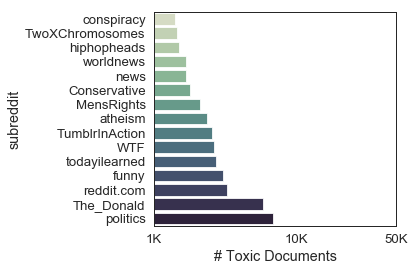

In [388]:
sns.set(context="paper", style="white", font_scale=1.5) 

toxic_subreddits = (master_z..subreddit.value_counts()).head(n=15)
data = toxic_subreddits.reset_index()
data.columns = ['subreddit', '# Toxic Documents']
data = data.sort_values(by='# Toxic Documents', ascending=True)
ax = sns.barplot(data=data, x='# Toxic Documents', y='subreddit', palette=sns.cubehelix_palette(15, start=.5, rot=-.75, reverse=False))
ax.set_xscale('log')
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(mticker.NullFormatter())

ax.set_xticks([1000, 10000, 50000])
ax.set_xticklabels(["1K", "10K", "50K"])
plt.tight_layout()
plt.savefig("toxic_subreddits.pdf", dpi=300)

In [183]:
data = master_z.domain.value_counts().reset_index()
data.columns = ['domain', '# of Documents']
site_biases  = data.merge(site_bias, how='left',on='domain')  
domain_toxicity = master_z.groupby('domain').is_toxic_only.sum().reset_index()
domain_toxicity.columns = ['domain', '# of Toxic Documents']
site_biases = site_biases.merge(domain_toxicity, on='domain')
site_biases['prop_documents'] = (site_biases['# of Toxic Documents'] / site_biases['# of Documents']) * 100

In [61]:
site_biases.drop_duplicates(subset=['domain']).dropna().loc[site_biases.drop_duplicates(subset=['domain']).dropna().bias.str.contains('extreme')]['# of Toxic Documents'].sum()

506.0

In [218]:
master_z.l

0          False
1           True
2          False
3           True
4           True
5           True
6          False
7          False
8          False
9          False
10          True
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19          True
20          True
21          True
22          True
23          True
24         False
25         False
26         False
27          True
28         False
29          True
           ...  
7347326     True
7347327     True
7347328     True
7347329    False
7347330     True
7347331    False
7347332    False
7347333    False
7347334     True
7347335    False
7347336     True
7347337    False
7347338     True
7347339    False
7347340    False
7347341    False
7347342     True
7347343    False
7347344    False
7347345     True
7347346    False
7347347    False
7347348    False
7347349     True
7347350    False
7347351     True
7347352    False
7347353    Fal

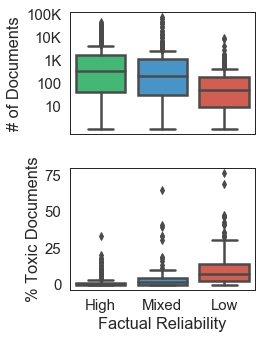

In [185]:
fig, axes = plt.subplots(2,1, figsize=(4,5), sharex=True)
sns.set(context="paper", style="white", font_scale=1.7)
palette = sns.color_palette(["#2ecc71","#3498db", "#e74c3c" ])

sns.boxplot(data=site_biases.loc[site_biases['# of Documents'] >= 10], x='fact', y='prop_documents', order=["HIGH", "MIXED", "LOW"], palette=palette,linewidth=2.5, ax=axes[1])
axes[1].set_xticklabels(["High", "Mixed", "Low"])
axes[1].set_ylabel("% Toxic Documents")
axes[1].set_xlabel("Factual Reliability")

sns.set(context="paper", style="white", font_scale=1.7)
sns.boxplot(data=site_biases.drop_duplicates(subset=['domain']).dropna(), x='fact', y='# of Documents',palette=palette, order=["HIGH", "MIXED", "LOW"], linewidth=2.5, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_yticks([10,100, 1000, 10000, 100000])
axes[0].set_yticklabels([10, 100, "1K", "10K", "100K"])
axes[0].set_xticklabels(["High", "Mixed", "Low"])
axes[0].set_xlabel("")
plt.tight_layout()

plt.savefig("factual_reliability_toxicity.pdf", dpi=300)



In [146]:
site_biases['fact_numeric'] = site_biases['fact'].apply(bucket)
site_biases['bias_numeric'] = site_biases['bias'].apply(bucket)
site_biases.loc[site_biases['# of Documents'] > 10][['fact_numeric', 'prop_documents']].corr(method='spearman')

,fact_numeric,prop_documents
fact_numeric,1.00000,-0.35022
prop_documents,-0.35022,1.00000


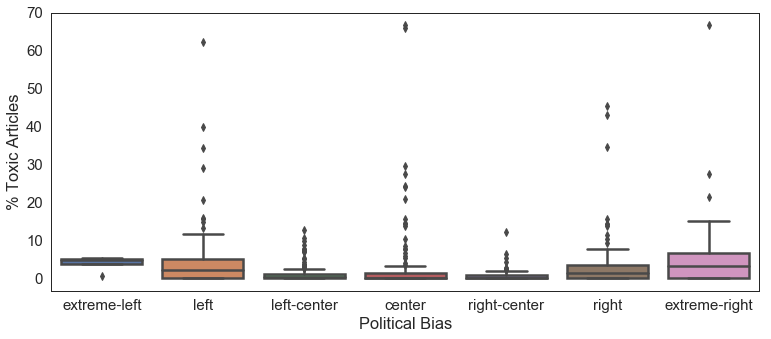

In [91]:
fig, axes = plt.subplots(1,1, figsize=(11,5))

sns.set(context="paper", style="white", font_scale=1.7)

sns.boxplot(data=site_biases.loc[site_biases['# of Documents'] > 10].dropna(), x='bias', y='prop_documents', order = ["extreme-left", "left", "left-center", "center", "right-center", "right", "extreme-right"], linewidth=2.5, ax=axes)

axes.set_ylabel("% Toxic Articles")
axes.set_xlabel("Political Bias")

plt.tight_layout()
# plt.savefig("factual_reliability_toxicity.pdf", dpi=300)

# ax.set_yscale('log')
# ax.set_xlabel("Political Bias")
# ax.set_ylabel("Number of News Articles")
# ax.set_yticks([100, 1000, 10000, 100000])
# ax.set_yticklabels([100, "1K", "10K", "100K"])
# ax.set_xticks([0,1, 2, 3, 4, 5, 6])
# ax.set_xticklabels(["Extreme-Left", "Left", "Left-Center", "Center", "Right-Center", "Right", "Extreme-Right"])

# ax.xaxis.tick_bottom()
plt.tight_layout()
plt.savefig("political_bias_toxicity.pdf", dpi=300)

In [210]:
subreddit_biases = master_z.loc[master_z.is_dup].subreddit.value_counts().reset_index()
subreddit_biases.columns = ['subreddit', '# of Documents']
subreddit_toxicity = master_z.loc[master_z.is_dup].groupby('subreddit').is_toxic_only.sum().reset_index()
subreddit_toxicity.columns = ['subreddit', '# of Toxic Documents']
subreddit_biases = subreddit_biases.merge(subreddit_toxicity, on='subreddit')
subreddit_biases['prop_documents'] = (subreddit_biases['# of Toxic Documents'] / subreddit_biases['# of Documents']) * 100
subreddit_biases = subreddit_biases.loc[subreddit_biases['# of Documents'] > 0].sort_values(by='prop_documents', ascending=True)



In [217]:
dup_z.loc[dup_z.is_quarantined].subreddit.value_counts()

The_Donald               40906
european                  4373
WhiteRights               3921
uncensorednews            3322
SargonofAkkad             1372
MGTOW                     1101
ChapoTrapHouse             891
The_Europe                 624
911truth                   592
europeannationalism        538
sjwhate                    507
TheRedPill                 505
altright                   446
NationalSocialism          437
CringeAnarchy              387
Mr_Trump                   337
toosoon                    298
ZOG                        243
FULLCOMMUNISM              212
The_DonaldUnleashed        190
GentilesUnited             134
milliondollarextreme       129
TrayvonMartin              128
edefreiheit                108
multiculturalcancer         78
greatawakening              73
SanctionedSuicide           69
CBTS_Stream                 68
Polistan                    66
WhiteIdentity               66
                         ...  
Stealing                     1
deathtoa

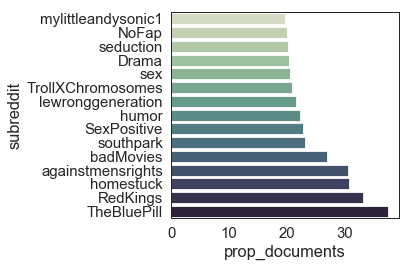

In [149]:
ax = sns.barplot(data=subreddit_biases.tail(n=15), x='prop_documents', y='subreddit', palette=sns.cubehelix_palette(15, start=.5, rot=-.75, reverse=False))
plt.tight_layout()

In [97]:
master_z['is_quarantined'] = master_z.subreddit.isin(banned_subreddits.subreddit)

In [124]:
dup_z = master_z.loc[master_z.is_dup]

In [154]:
dup_z.loc[dup_z.fact.isin(['MIXED', 'LOW'])].filename.unique().shape[0]

118741

In [126]:
toxic_dup_z = dup_z.loc[dup_z.is_toxic_only]

In [156]:
toxic_dup_z.loc[toxic_dup_z.fact.isin(['MIXED', 'LOW'])].filename.unique().shape[0] / toxic_dup_z.shape[0]

0.11746727115276857

In [168]:
dup_z.loc[dup_z.is_quarantined].subreddit.value_counts()

The_Donald               40906
european                  4373
WhiteRights               3921
uncensorednews            3322
SargonofAkkad             1372
MGTOW                     1101
ChapoTrapHouse             891
The_Europe                 624
911truth                   592
europeannationalism        538
sjwhate                    507
TheRedPill                 505
altright                   446
NationalSocialism          437
CringeAnarchy              387
Mr_Trump                   337
toosoon                    298
ZOG                        243
FULLCOMMUNISM              212
The_DonaldUnleashed        190
GentilesUnited             134
milliondollarextreme       129
TrayvonMartin              128
edefreiheit                108
multiculturalcancer         78
greatawakening              73
SanctionedSuicide           69
CBTS_Stream                 68
Polistan                    66
WhiteIdentity               66
                         ...  
Stealing                     1
deathtoa

In [301]:
len(master_z.domain.unique())

232238

In [289]:
toxic_dup_z.loc[toxic_dup_z.subreddit == 'TheRedPill'].sample(n=1)

,subreddit,url,tld_extraction,domain,source_url,source_url_processed,URL,fact,bias,filename,is_toxic_only,is_toxic_all,is_quarantined,is_dup
5522062,TheRedPill,http://melbuniblog.com/2012/10/14/useless-caus...,"(, melbuniblog, com)",melbuniblog.com,NaN,NaN,NaN,NaN,NaN,0480686-cada9e849286706561a28e88442c06c1.txt,True,True,True,True


In [250]:
banned_subreddit_biases = master_z.loc[master_z.is_quarantined].subreddit.value_counts().reset_index()
banned_subreddit_biases.columns = ['subreddit', '# of Documents']
banned_subreddit_toxicity = master_z.loc[master_z.is_quarantined].groupby('subreddit').is_toxic_all.sum().reset_index()
banned_subreddit_toxicity.columns = ['subreddit', '# of Toxic Documents']
banned_subreddit_biases = banned_subreddit_biases.merge(banned_subreddit_toxicity, on='subreddit')
banned_subreddit_biases['prop_documents'] = (banned_subreddit_biases['# of Toxic Documents'] / banned_subreddit_biases['# of Documents']) * 100
banned_subreddit_biases = banned_subreddit_biases.sort_values(by='prop_documents', ascending=True)
banned_subreddit_biases['is_quarantined'] = 1


good_subreddit_biases = master_z.loc[~master_z.is_quarantined].subreddit.value_counts().reset_index()
good_subreddit_biases.columns = ['subreddit', '# of Documents']
good_subreddit_toxicity = master_z.loc[~master_z.is_quarantined].groupby('subreddit').is_toxic_all.sum().reset_index()
good_subreddit_toxicity.columns = ['subreddit', '# of Toxic Documents']
good_subreddit_biases = good_subreddit_biases.merge(good_subreddit_toxicity, on='subreddit')
good_subreddit_biases['prop_documents'] = (good_subreddit_biases['# of Toxic Documents'] / good_subreddit_biases['# of Documents']) * 100
good_subreddit_biases = good_subreddit_biases.sort_values(by='prop_documents', ascending=True)
good_subreddit_biases['is_quarantined'] = 0

master_biases = pd.concat([banned_subreddit_biases, good_subreddit_biases], 0)


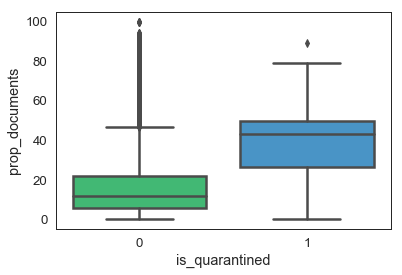

In [251]:
ax = sns.boxplot(data=master_biases.loc[master_biases['# of Documents'] > 10], x='is_quarantined', y='prop_documents', palette=palette,linewidth=2.5)

In [221]:
banned_subreddit_biases[['is_quarantined', 'prop_documents']].corr(method='spearman')

KeyError: "['is_quarantined'] not in index"

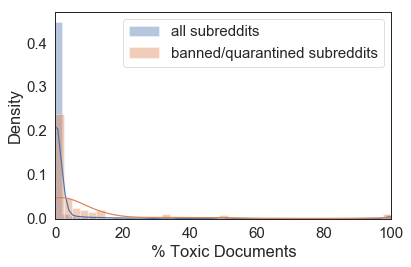

In [223]:
fig, ax = plt.subplots(1,1,  sharex=True)

sns.distplot(subreddit_biases.prop_documents,label='all subreddits')
sns.distplot(banned_subreddit_biases.prop_documents, ax=ax, label='banned/quarantined subreddits').set(xlim=(0, 100))
ax.set_ylabel('Density')
ax.set_xlabel('% Toxic Documents')
plt.legend()
plt.tight_layout()
plt.savefig("subreddits_owtc_toxicity.pdf", dpi=300)

(191, 4)

In [81]:
def compute_metrics(perspective_label, predicted_toxic_documents):
    TP = len(set(predicted_toxic_documents) &  set(ground_truth[perspective_label])) 
    FP = len(set(predicted_toxic_documents) -  set(ground_truth[perspective_label])) 
    FN = len(set(ground_truth[perspective_label]) -  set(naughty_documents)) 
    prec = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (prec * recall ) / (prec + recall)
    return {'precision': prec, 'recall': recall, 'f1':f1}

In [53]:
master_z.bias.value_counts()

left-center      572086
left             383834
right            230378
center           226789
right-center     115226
extreme-right     35801
extreme-left       1070
Name: bias, dtype: int64

In [54]:
predicted_toxic_documents = master_z.filename.loc[(master_z.bias == 'extreme-right') | (master_z.bias == 'extreme-left')]

In [55]:
predicted_toxic_documents.shape

(36871,)

In [56]:
predicted_toxic_documents.to_csv("extreme_documents.txt", sep='\n', header=False, index=False)

In [38]:
master_z.loc[(~master_z.is_quarantined) & master_z.is_toxic].subreddit.value_counts()

worldnews               55182
politics                51356
news                    31225
todayilearned           20415
reddit.com              18161
atheism                 17240
conspiracy              15338
WTF                     12630
Conservative            12518
MensRights              12293
worldpolitics           11645
india                   10386
nottheonion              9699
GunsAreCool              8637
offbeat                  7666
POLITIC                  7646
lgbt                     7577
Bad_Cop_No_Donut         7418
funny                    7203
unitedkingdom            6398
TwoXChromosomes          6301
australia                6242
movies                   5873
secretsanta              5485
TumblrInAction           5298
Libertarian              5110
technology               4964
europe                   4956
canada                   4759
Israel                   4712
                        ...  
KnifeFish                   1
Liberal_Atheism             1
animepcgam

In [30]:
66024 / (1090639 + 66024)

0.057081448961365584

In [143]:
z_dup[['fact_numeric', 'prop_documents']].corr(method='spearman')

NameError: name 'z_dup' is not defined

In [345]:
site_biases.bias.value_counts(normalize=True)

center           0.253366
left-center      0.209302
left             0.161567
right            0.152999
extreme-right    0.121175
right-center     0.094247
extreme-left     0.007344
Name: bias, dtype: float64

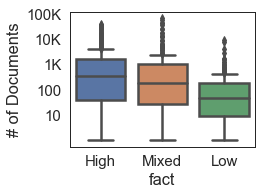

In [368]:
fig, axes = plt.subplots(1,1, figsize=(4,3))
sns.set(context="paper", style="white", font_scale=1.7)
sns.boxplot(data=site_biases.drop_duplicates(subset=['domain']).dropna(), x='fact', y='# of Documents', order=["HIGH", "MIXED", "LOW"], linewidth=2.5, ax=axes)
axes.set_yscale('log')
axes.set_yticks([10,100, 1000, 10000, 100000])
axes.set_yticklabels([10, 100, "1K", "10K", "100K"])
axes.set_xticklabels(["High", "Mixed", "Low"])


# low_df = (urls.loc[urls['fact'] == 'LOW'].domain.value_counts()).head(n=10).reset_index()
# low_df.columns = ['Domain', "Number of Documents"]
# data = low_df.sort_values(by='Number of Documents', ascending=True)
# sns.barplot(data=data, x='Number of Documents', y='Domain', palette=sns.cubehelix_palette(10, start=.5, rot=-.75, reverse=False), ax=axes[1])
# axes[1].set_xscale('log')
# axes[1].set_xlim([0, 10000])
# axes[1].set_xticks([100, 1000, 10000])
# axes[1].set_xticklabels(["100", "1K", "10K"])
plt.tight_layout()
plt.savefig("fact.pdf", dpi=300)

In [278]:
z.loc[z.fact == 'LOW'].subreddit.value_counts()

The_Donald            8977
Conservative          3154
new_right             2563
WhiteRights           1995
conspiracy            1876
Libertarian           1605
MensRights            1538
TheOnion              1499
humor                 1278
politics              1026
IslamUnveiled          836
funny                  786
uncensorednews         707
PoliticalHumor         695
worldpolitics          573
POLITIC                537
reddit.com             511
HillaryForPrison       446
atheism                442
EndlessWar             411
unitedkingdom          400
european               369
australia              335
satire                 319
conservatives          305
ConservativesOnly      301
ireland                291
worldnews              280
news                   275
Anarcho_Capitalism     257
                      ... 
sharks                   1
LateShow                 1
NaziHunting              1
PoliticallyCorrect       1
IncelTears               1
chemistry                1
S

In [97]:
def read_data(dir_):
    total = len([x for x in Path().iterdir()])
    rows = [[str(file), file.read_text()] for file in tqdm(Path("data/subsample_100k/corpus").iterdir(), total=total)]
    return pd.DataFrame(rows, columns=['filename', 'text'])

In [4]:
files = pd.read_json("data/subsample_100k_ner_tokenized.jsonl", lines=True)

In [5]:
df = pd.read_csv("data/subsample_100k/docs.csv")

In [6]:
files['filename'] = files['filename'].str.split('/').apply(lambda x: x[-1])

In [7]:
master = df.merge(files)

In [8]:
master['tokenized_text'] = master['text'].str.replace('[^\w\s]','').str.split()

In [9]:
master['is_toxic'] = (master.insult > 0.5) | (master.severe_toxicity > 0.5) | (master.toxicity > 0.5) | (master.profanity > 0.5)|(master.sexually_explicit > 0.5) | (master.flirtation > 0.5) | (master.identity_attack > 0.5) | (master.threat > 0.5)

In [56]:
def pmi(df, x, y):
    print("filtering f_x...")
    f_x = df.word.value_counts().to_dict()
    words_to_include = [x for x in f_x if f_x[x] > 3]
    df = df.loc[df[x].isin(words_to_include)]
    print("counting f_x...")
    f_x = df.word.value_counts().to_dict()
    print("counting f_y...")
    f_y = df.is_toxic.value_counts().to_dict()
    print("counting f_xy...")
    f_xy = df.groupby(['word', 'is_toxic'])['word'].count().to_dict()
    print("calculating PMI...")
    pmi = [{'word': word, 'is_toxic':is_toxic, 'pmi': np.log(len(df.index) * f_xy[(word, is_toxic)] / (f_x[word] * f_y[is_toxic]))}  for (word, is_toxic) in tqdm(f_xy.keys())]
    return pmi

In [57]:
pmi_matrix = pmi(df, 'word', 'is_toxic')

filtering f_x...
counting f_x...
counting f_y...
counting f_xy...
calculating PMI...


In [75]:
p

NameError: name 'naughty_words' is not defined

In [59]:
pmi_matrix = pd.DataFrame(pmi_matrix)

In [85]:
new_naughty_words = pmi_matrix.loc[pmi_matrix.is_toxic == 1].sort_values(by='pmi', ascending=False).head(n=5000).word.tolist()

In [86]:
with open("new_naughty_words.txt", "w+") as f:
    for item in new_naughty_words:
        f.write(item + '\n')

In [12]:
from stop_words import get_stop_words

stop_words = get_stop_words('en')


toxic_text = master.loc[master.is_toxic].tokenized_text.progress_apply(lambda x: set(x) - set(stop_words))
non_toxic_text = master.loc[~master.is_toxic].tokenized_text.progress_apply(lambda x: set(x) - set(stop_words))


In [13]:
toxic_words = [(y,1) for x in tqdm(toxic_text) for y in list(x)]
nontoxic_words = [(y,0) for x in tqdm(non_toxic_text) for y in list(x)]


In [14]:
df = pd.concat([pd.DataFrame(toxic_words, columns=['word', 'is_toxic']), pd.DataFrame(nontoxic_words, columns=['word', 'is_toxic'])])

In [69]:
pmi_matrix = pmi(df, 'word', 'is_toxic')

counting f_x...
counting f_y...
counting f_xy...


In [73]:
pmi_matrix.loc[pmi_matrix.is_toxic == 1].sort_values('pmi', ascending=False)

,word,is_toxic,f_x,f_y,f_xy,pmi
13313892,chongs,0,9,21300533,9,0.181776
7076841,blackhall,0,3,21300533,3,0.181776
7076710,vacantsite,0,1,21300533,1,0.181776
993261,individualexchange,0,1,21300533,1,0.181776
7076724,semistate,0,3,21300533,3,0.181776
7076767,benburb,0,1,21300533,1,0.181776
7076810,phibsboro,0,2,21300533,2,0.181776
7076840,axa,0,6,21300533,6,0.181776
17061500,jihadistislamist,0,1,21300533,1,0.181776
17061300,rightsrespecting,0,3,21300533,3,0.181776


In [9]:
master.columns = ['filename', 'Insult Score', 'Severe Toxicity Score', 'Toxicity Score', 'Profanity Score', 'Sexually Explicit Score', 'Flirtation Score', 'Identity Attack Score', 'Threat Score', 'entities_NORP', 'entities_PERSON', 'text', 'Average Toxicity Score', 'tokenized_text']

### Load URLs

In [10]:
urls = pd.read_csv("data/openwebtext-urls.csv")
site_bias = pd.read_csv("data/mbfc.csv")
site_bias.columns=['source_url', 'domain', 'url', 'fact', 'bias']
urls = urls.merge(site_bias, on='domain',how='left')

# Analysis

## Toxicity Distributions

In [304]:
def plot_distributions(df, ax=None, compare_df=None, compare_df_1=None, kde=False, hist=False, logy=False, label=None, legend=None, legend_outside=False, color=None, save=None):
    if label:
        if not ax:
            f = plt.figure(figsize=(7,3))
        placement = [[label]]
    else:
        if not ax:
            f, axes = plt.subplots(4, 2, figsize=(10, 10))

        placement = [["Insult Score", "Severe Toxicity Score"],
                     ["Toxicity Score", "Profanity Score"],
                     ["Sexually Explicit Score", "Flirtation Score"],
                     ["Identity Attack Score", "Threat Score"]]
    for ix, row in enumerate(placement):
        for jx, col in enumerate(row):
            if label:
                leg = legend[0] if legend else None
                c = color[0] if color else None
                ax = sns.distplot(df[col], kde=kde, hist=hist, bins=50, label=leg, color=c, ax=ax,kde_kws={"lw": 2})
            else:
                ax = axes[ix, jx]
                sns.distplot(df[col], kde=kde, hist=hist, bins=50, ax=ax, kde_kws={"lw": 2})

            if compare_df is not None:
                if label:
                    leg = legend[1] if legend else None
                    c = color[1] if color else "blue"
                    ax = sns.distplot(compare_df[col], kde=kde, hist=hist, bins=50, color=c, label=leg, ax=ax, kde_kws={"lw": 2})
                else:
                    ax = sns.distplot(compare_df[col], kde=kde, hist=hist, bins=50, ax=ax, color="blue", kde_kws={"lw": 2})
            
            if compare_df_1 is not None:
                if label:
                    leg = legend[2] if legend else None
                    c = color[2] if color else "blue"
                    ax = sns.distplot(compare_df_1[col], kde=kde, hist=hist, bins=50, color=c, label=leg, ax=ax, kde_kws={"lw": 2})
                else:
                    ax = sns.distplot(compare_df_1[col], kde=kde, hist=hist, bins=50, ax=ax, color="blue", kde_kws={"lw": 2})
            if (ix, jx) == (0, 0):
                if not kde:
                    ax.set_ylabel("# Documents")
                else:
                    ax.set_ylabel("Density")
            ax.set_xlim([0, 1])
            if logy:
                ax.set_yscale('log')
            if legend:
                if legend_outside:
                    plt.legend(bbox_to_anchor=(-1.05, 1), loc=2, borderaxespad=0.)
                else:
                    plt.legend()


                
    plt.tight_layout()
    if save:
        plt.savefig(save, dpi=300)
    return ax

In [172]:
def extract_entity(doc, label):
    norps = []
    for ent in doc.ents:
        if ent.label_ == label: 
            norps.append(ent.text)
    return norps

def get_popular_entities(df, entity, entity_label, pal=None, remove=[], convert={}, ax=None):
    stemmer = PorterStemmer()
    entities = [stemmer.stem(st.lower()) for row in tqdm(df[entity]) for st in row]
    entities = [x for x in entities if x not in remove]
    if convert:
        entities = [convert[x] if convert.get(x) else x for x in entities]
    data = pd.Series(entities).value_counts().head(n=10).reset_index()
    data.columns = ['Ethnic/Religious Group', '# Identity Attack Docs']
    data = data.sort_values(by='# Identity Attack Docs', ascending=True)
    ax = sns.barplot(data=data, x='# Identity Attack Docs', y='Ethnic/Religious Group', palette=pal, ax=ax)
    ax.set_xlabel("# of Mentions in Identity Attacks or Threats")
    plt.tight_layout()

In [45]:
with open('data/identity_mentions.txt', 'r') as f:
    entities = f.readlines()
    entities = [x.strip().lower().split() for x in entities]
    stemmer = PorterStemmer()
    entities = [stemmer.stem(x) for y in tqdm(entities) for x in y]

In [46]:
identities = ["lesbian",
"gay",
"bisexual",
"transgender",
"trans",
"queer",
"lgbt",
"lgbtq",
"homosexual",
"straight",
"heterosexual",
"male",
"female",
"nonbinary",
"african",
"african american",
"black",
"white",
"european",
"hispanic",
"latino",
"latina",
"latinx",
"mexican",
"canadian",
"american",
"asian",
"indian",
"middle eastern",
"chinese",
"japanese",
"christian",
"muslim",
"jewish",
"buddhist",
"catholic",
"protestant",
"sikh",
"taoist",
"old",
"older",
"young",
"younger",
"teenage",
"millenial",
"middle aged",
"elderly",
"blind",
"jew",
"deaf",
"paralyzed"]

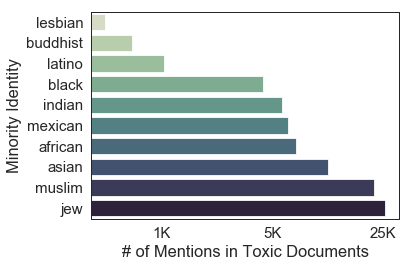

In [47]:
convert = {'jewish': 'jew'}
remove = ['american', 'white', 'christian', 'european', 'canadian']
entities = [x for x in entities if x not in remove and x in identities]
entities = [convert[x] if convert.get(x) else x for x in entities]
data = pd.Series(entities).value_counts().head(n=10).reset_index()
data.columns = ['Minority Identity', '# Toxic Documents']
data = data.sort_values(by='# Toxic Documents', ascending=True)
ax = sns.barplot(data=data, x='# Toxic Documents', y='Minority Identity', palette=sns.cubehelix_palette(10, start=.5, rot=-.75, reverse=False))
ax.set_xlabel("# of Mentions in Toxic Documents")

plt.tight_layout()
ax.set_xscale('log')
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(mticker.NullFormatter())
ax.set_xticks([1000, 5000, 25000])
ax.set_xticklabels(["1K","5K", "25K"])

plt.savefig('identities.pdf', dpi=300)

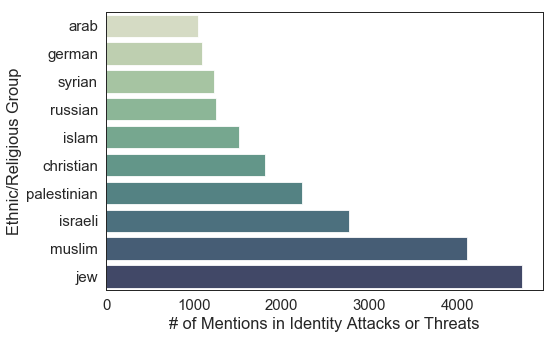

In [260]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
f = plt.figure(figsize=(8, 5))

sns.set(context="paper", style="white", font_scale=1.7) 

subdf = master.loc[(master['Identity Attack Score'] > 0.5) | (master['Threat Score'] > 0.5)]
get_popular_entities(subdf,
                     "entities_NORP",
                     "Ethnic / Religious Group",
                     pal = sns.cubehelix_palette(12, start=.5, rot=-.75, reverse=False),
                     remove=["american", "republican", "democrat"],
                     convert={"jewish": "jew", "isra": "israeli", "palestinian": "palestinian", "christian": "christian"})

# ax2 = plt.subplot(gs[:3, 3:])
# plot_distributions(master.loc[master['tokenized_text'].apply(lambda x: 'jew' in x)],
#                    compare_df=master.loc[master['tokenized_text'].apply(lambda x: 'christian' in x)],
#                    kde=True,
#                    label="Identity Attack Score",
#                    ax=ax2,
#                    color=["r", "b"],
#                    legend=["jew", "christian"],
#                    logy=False)
# ax3 = plt.subplot(gs[3:, :])
# plot_distributions(master.loc[master['tokenized_text'].apply(lambda x: 'muslim' in x)],
#                    compare_df=master.loc[master['tokenized_text'].apply(lambda x: 'christian' in x)],
#                    compare_df_1=master.loc[master['tokenized_text'].apply(lambda x: 'jew' in x)],
#                    kde=True,
#                    ax=ax3,
#                    label="Identity Attack Score",
#                    color=["r", "b", "g"],
#                    legend=["Muslim", "Christian", "Jew"],
#                    logy=False)
# plt.tight_layout()
plt.savefig("ethnic_religious_groups.pdf", dpi=300)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


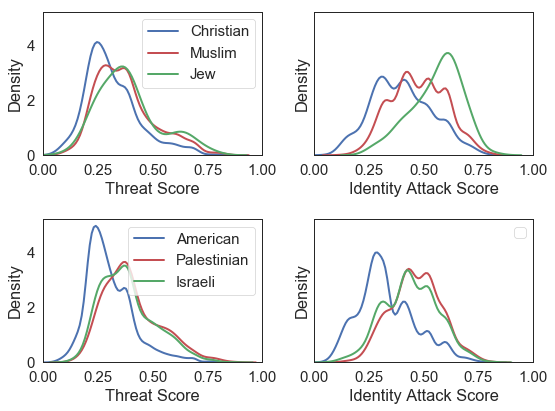

In [328]:

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

sns.set(context="paper", style="white", font_scale=1.7) 
f, axes = plt.subplots(2, 2, figsize=(8, 6), sharey=True)

plot_distributions(master.loc[master['entities_NORP'].apply(lambda x: 'Christian' in x)],
                   compare_df=master.loc[master['entities_NORP'].apply(lambda x: 'Muslim' in x)],
                   compare_df_1=master.loc[master['entities_NORP'].apply(lambda x: 'Jew' in x)],
                   kde=True,
                   ax=axes[0,1],
                   label="Identity Attack Score",
                   color=["b", "r", "g"],
                   legend_outside=False,
                   logy=False)
plot_distributions(master.loc[master['entities_NORP'].apply(lambda x: 'Christian' in x)],
                   compare_df=master.loc[master['entities_NORP'].apply(lambda x: 'Muslim' in x)],
                   compare_df_1=master.loc[master['entities_NORP'].apply(lambda x: 'Jew' in x)],
                   kde=True,
                   ax=axes[0,0],
                   label="Threat Score",
                   color=["b", "r", "g"],
                   legend=["Christian", "Muslim", "Jew"],
                   legend_outside=False,
                   logy=False)


plot_distributions(master.loc[master['entities_NORP'].apply(lambda x: 'American' in x)],
                   compare_df=master.loc[master['entities_NORP'].apply(lambda x: 'Palestinian' in x)],
                   compare_df_1=master.loc[master['entities_NORP'].apply(lambda x: 'Israeli' in x)],
                   kde=True,
                   ax=axes[1,1],
                   label="Identity Attack Score",
                   color=["b", "r", "g"],
                   legend_outside=False,
                   logy=False)

plot_distributions(master.loc[master['entities_NORP'].apply(lambda x: 'American' in x)],
                   compare_df=master.loc[master['entities_NORP'].apply(lambda x: 'Palestinian' in x)],
                   compare_df_1=master.loc[master['entities_NORP'].apply(lambda x: 'Israeli' in x)],
                   kde=True,
                   ax=axes[1,0],
                   label="Threat Score",
                   color=["b", "r", "g"],
                   legend=["American", "Palestinian", "Israeli"],
                   legend_outside=False,
                   logy=False)


plt.tight_layout()
plt.savefig("identity_attack_dists.pdf", dpi=300)

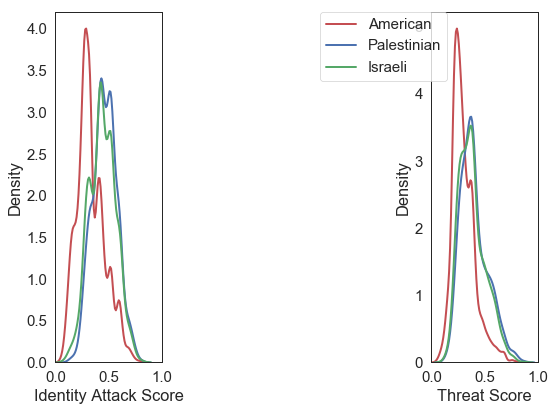

In [324]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
f = plt.figure(figsize=(8, 6))

sns.set(context="paper", style="white", font_scale=1.7) 
gs = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs[:, :1])
plot_distributions(master.loc[master['entities_NORP'].apply(lambda x: 'American' in x)],
                   compare_df=master.loc[master['entities_NORP'].apply(lambda x: 'Palestinian' in x)],
                   compare_df_1=master.loc[master['entities_NORP'].apply(lambda x: 'Israeli' in x)],
                   kde=True,
                   ax=ax1,
                   label="Identity Attack Score",
                   color=["r", "b", "g"],
                   legend=None,
                   logy=False)
ax2 = plt.subplot(gs[:, 1:])

plot_distributions(master.loc[master['entities_NORP'].apply(lambda x: 'American' in x)],
                   compare_df=master.loc[master['entities_NORP'].apply(lambda x: 'Palestinian' in x)],
                   compare_df_1=master.loc[master['entities_NORP'].apply(lambda x: 'Israeli' in x)],
                   kde=True,
                   ax=ax2,
                   label="Threat Score",
                   color=["r", "b", "g"],
                   legend=["American", "Palestinian", "Israeli"],
                   legend_outside=True,
                   logy=False)


In [224]:
site_bias

NameError: name 'site_bias' is not defined

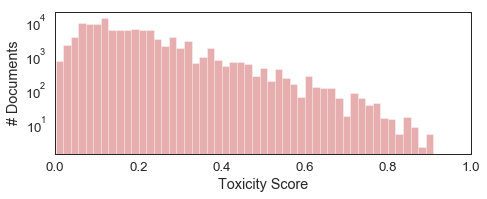

In [61]:
ax = plot_distributions(master, label='Toxicity Score', logy=True, save="toxicity_distribution.pdf")

(0, 1)

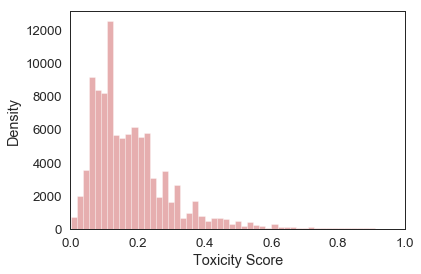

In [18]:
ax = sns.distplot(master["Toxicity Score"], kde=False, bins=50)
ax.set_ylabel("Density")
ax.set_xlim([0, 1])

(0, 1)

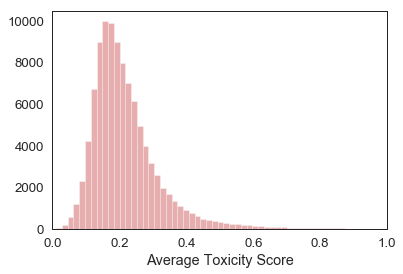

In [19]:
ax = sns.distplot(master['Average Toxicity Score'], kde=False, bins=50)
ax.set_xlim([0, 1])

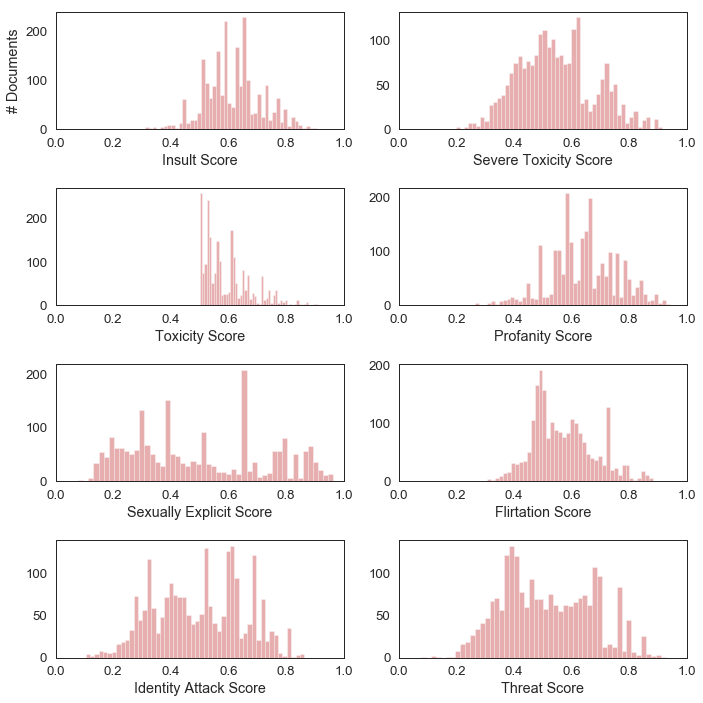

In [20]:
plot_distributions(master.loc[(master['Toxicity Score'] > 0.5)])

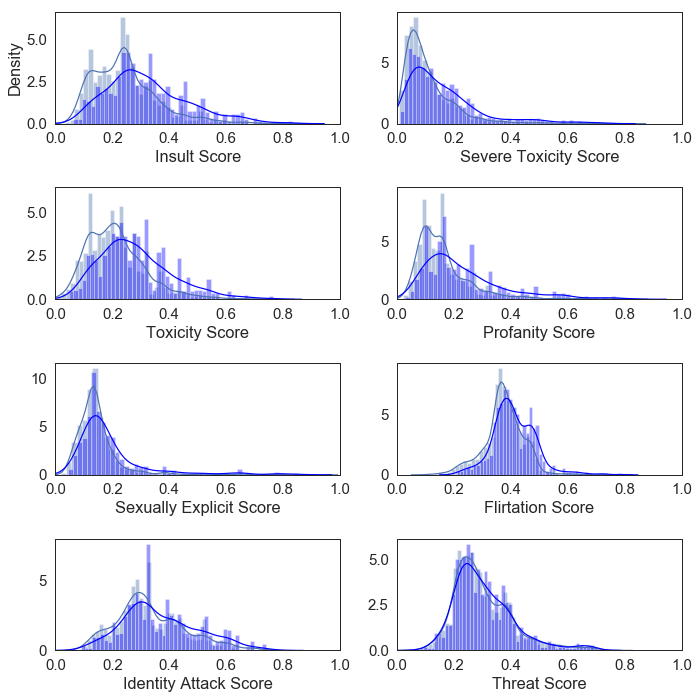

In [164]:
plot_distributions(master.loc[master['entities_PERSON'].apply(lambda x: 'Obama' in x)],
                   compare_df=master.loc[master['entities_PERSON'].apply(lambda x: 'Hillary' in x)],
                   kde=True,
                   logy=False)

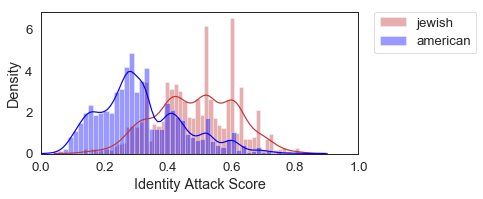

In [49]:
plot_distributions(master.loc[master['tokenized_text'].apply(lambda x: 'jewish' in x)],
                   compare_df=master.loc[master['tokenized_text'].apply(lambda x: 'american' in x)],
                   kde=True,
                   label="Identity Attack Score",
                   legend=["jewish", "american"],
                   logy=False,
                   save="jewish_american.pdf")

In [10]:
def pmi(dff, x, y):
    df = dff.copy()
    df['f_x'] = df.groupby(x)[x].transform('count')
    df['f_y'] = df.groupby(y)[y].transform('count')
    df['f_xy'] = df.groupby([x, y])[x].transform('count')
    df['pmi'] = np.log(len(df.index) * df['f_xy'] / (df['f_x'] * df['f_y']) )
    return df


slist = [(ix, st) for ix, row in tqdm(enumerate(master.tokenized_text)) for st in row]


68408074

In [ ]:
out = []
for ix, row in tqdm(enumerate(slist)):
    q = [0, 0]
    q[0] = master['Threat Score'][ix] > 0.5
    q[1] = row[1]
    out.append(q)

Exception ignored in: <function tqdm.__del__ at 0x12140bb70>
Traceback (most recent call last):
  File "/Users/suching/.pyenv/versions/miniconda3-4.3.11/envs/allennlp/lib/python3.7/site-packages/tqdm/std.py", line 1065, in __del__
    def __del__(self):
KeyboardInterrupt


KeyboardInterrupt: 

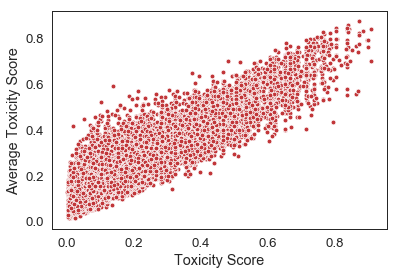

In [12]:
sns.scatterplot(data=master, x="Toxicity Score", y="Average Toxicity Score")

In [67]:
columns = [x for x in master.columns if "Score" in x]
master[columns].corr().mean()

Insult Score               0.811864
Severe Toxicity Score      0.827943
Toxicity Score             0.800019
Profanity Score            0.802461
Sexually Explicit Score    0.669512
Flirtation Score           0.606825
Identity Attack Score      0.663845
Threat Score               0.657178
Average Toxicity Score     0.861554
dtype: float64

## Naughty Words

In [76]:
with open('data/naughty_words.txt', 'r') as f:
    naughty_words = [x.strip() for x in f.readlines()]
    
def get_naughty_words(text):
    if len(set(text.split()) & set(naughty_words)) > 0:
        return set(text.split()) & set(naughty_words)
    else:
        return np.nan

master['naughty_words'] = master.text.progress_apply(get_naughty_words)
master['is_toxic_naughty_words'] = ~master.naughty_words.isna()

### Most common naughty words

In [23]:
pd.Series([item for row in master['naughty_words'].dropna() for item in row]).value_counts().head(n=15)

sex         2582
rape        1031
shit         781
fucking      620
dick         606
fuck         518
ass          490
hardcore     406
sexy         341
suck         318
porn         316
butt         290
nude         234
raping       220
bullshit     204
dtype: int64

### Naughty word false positives

In [24]:
fp = master.loc[(master['is_toxic_naughty_words'] == 1) & (master['Toxicity Score'] < 0.5)]
pd.Series([item for row in fp['naughty_words'] for item in row]).value_counts().head(n=15)

sex           2249
rape           874
dick           529
shit           406
hardcore       384
ass            295
sexy           294
porn           245
suck           244
butt           243
fucking        238
nude           202
escort         192
domination     188
raping         184
dtype: int64

### Naughty words vs. Perspective API

In [25]:
from sklearn.metrics import precision_recall_fscore_support
score_cols = [col for col in master.columns if "Score" in col]
precs = []
recalls = []
f1s = []
for col in score_cols:
    precision, recall, f1, _ = precision_recall_fscore_support(y_pred=master['is_toxic_naughty_words'],
                                                              y_true=master[col] > 0.5,
                                                              average='binary')
    print(f"{col.upper()}: precision: {precision}, recall: {recall}, f1: {f1}")
    precs.append(precision)
    recalls.append(recall)
    f1s.append(f1)

INSULT SCORE: precision: 0.20182291666666666, recall: 0.5535714285714286, f1: 0.2958015267175573
SEVERE TOXICITY SCORE: precision: 0.11675347222222222, recall: 0.766928011404134, f1: 0.2026556172897636
TOXICITY SCORE: precision: 0.1591796875, recall: 0.6626016260162602, f1: 0.2566929133858268
PROFANITY SCORE: precision: 0.19173177083333334, recall: 0.690504103165299, f1: 0.30012738853503185
SEXUALLY EXPLICIT SCORE: precision: 0.2684461805555556, recall: 0.7844007609384908, f1: 0.39999999999999997
FLIRTATION SCORE: precision: 0.2965494791666667, recall: 0.34230961923847697, f1: 0.31779069767441864
IDENTITY ATTACK SCORE: precision: 0.1929253472222222, recall: 0.3185808994803799, f1: 0.24031898357775222
THREAT SCORE: precision: 0.1557074652777778, recall: 0.26200474712433813, f1: 0.19533111005240592
AVERAGE TOXICITY SCORE: precision: 0.15201822916666666, recall: 0.7428419936373277, f1: 0.25238695730499006


## Targeted Groups

In [31]:
def get_popular_tokens(df, remove=[], convert={}):
    stemmer = PorterStemmer()
    entities = [stemmer.stem(st.lower()) for row in tqdm(df['tokenized_text']) for st in row]
    entities = [x for x in entities if x not in remove]
    if convert:
        entities = [convert[x] if convert.get(x) else x for x in entities]
    ax = pd.Series(entities).value_counts().head(n=10).plot(kind='barh')
    ax.set_ylabel("tokens")
    ax.set_xlabel("# Toxic Documents")
    plt.tight_layout()
    return entities

In [27]:
def extract_pos(doc, label):
    norps = []
    for token in doc:
        if token.tag_ == label: 
            norps.append(token.text)
    return norps

def get_popular_pos(df, pos):
    df[pos] = df.nlp_docs.progress_apply(lambda x: extract_pos(x, pos))
    stemmer = PorterStemmer()
    pos_ = [stemmer.stem(st.lower()) for row in tqdm(df[pos]) for st in row]
    ax = pd.Series(pos_).value_counts().head(n=15).plot(kind='barh')
    ax.set_ylabel(pos)
    ax.set_xlabel("Number of Docs")

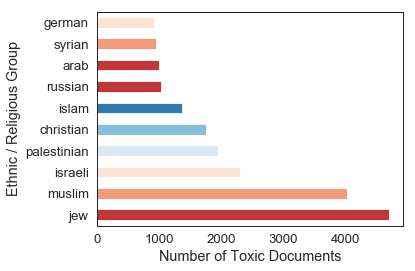

In [54]:
subdf = master.loc[(master['Identity Attack Score'] > 0.5)]
get_popular_entities(subdf,
                     "entities_NORP",
                     "Ethnic / Religious Group",
                     remove=["american", "republican", "democrat"],
                     convert={"jewish": "jew", "isra": "israeli"})
plt.savefig("ethnic_religious_groups.pdf", dpi=300)

In [21]:
pd.Series(pop_tokens).value_counts().head(n=50).tail(n=10)

offic      3989
against    3953
man        3925
how        3887
me         3873
take       3809
—          3794
year       3771
could      3762
where      3727
dtype: int64

## URL Domains Analysis

### Most popular domains

Text(0.5,0,'Percent of corpus')

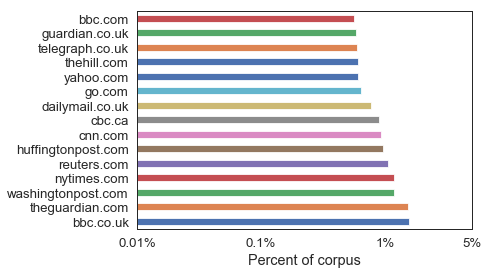

In [26]:
ax = (urls.domain.value_counts(normalize=True) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.01, 0.1, 1, 5])
ax.set_xticklabels(["0.01%", "0.1%", "1%", "5%"])
ax.set_xlabel("Percent of corpus")

### Biased News Analysis

Text(0.5,0,'Percent of corpus')

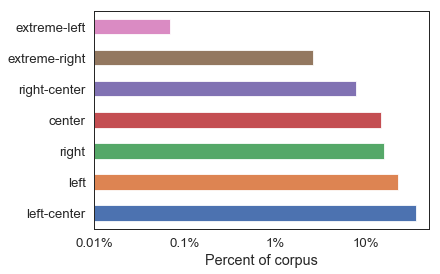

In [27]:
ax = (urls.bias.value_counts(normalize=True) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.01, 0.1, 1, 10])
ax.set_xticklabels(["0.01%", "0.1%", "1%", "10%"])
ax.set_xlabel("Percent of corpus")

[Text(0,0,'100'), Text(0,0,'1K'), Text(0,0,'10K')]

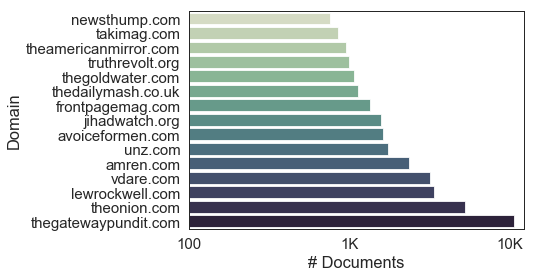

In [124]:
low_df = (urls.loc[urls['fact'] == 'LOW'].domain.value_counts()).head(n=15).reset_index()
low_df.columns = ['Domain', "# Documents"]
data = low_df.sort_values(by='# Documents', ascending=True)
ax = sns.barplot(data=data, x='# Documents', y='Domain', palette=sns.cubehelix_palette(15, start=.5, rot=-.75, reverse=False))
ax.set_xscale('log')
ax.set_xticks([100, 1000, 10000])
ax.set_xticklabels(["100", "1K", "10K"])


Text(0.5,0,'Percent of corpus')

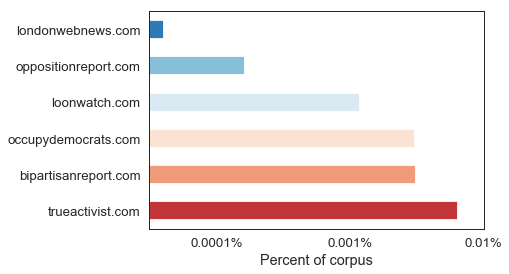

In [32]:
subdf = urls.loc[urls['bias'] == 'extreme-left']
ax = ((subdf.domain.value_counts() / urls.shape[0]) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.0001, 0.001, 0.01])
ax.set_xticklabels(["0.0001%", "0.001%", "0.01%"])
ax.set_xlabel("Percent of corpus")

Text(0.5,0,'Percent of corpus')

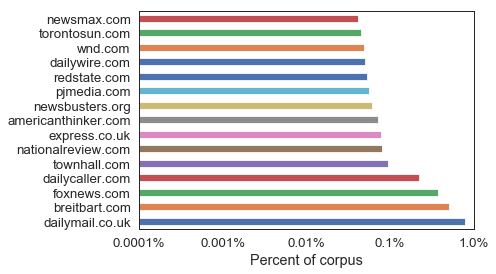

In [28]:
subdf = urls.loc[urls['bias'] == 'right']
ax = ((subdf.domain.value_counts() / urls.shape[0]) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.0001, 0.001, 0.01, 0.1, 1])
ax.set_xticklabels(["0.0001%", "0.001%", "0.01%", "0.1%", "1.0%"])
ax.set_xlabel("Percent of corpus")

Text(0.5,0,'Percent of corpus')

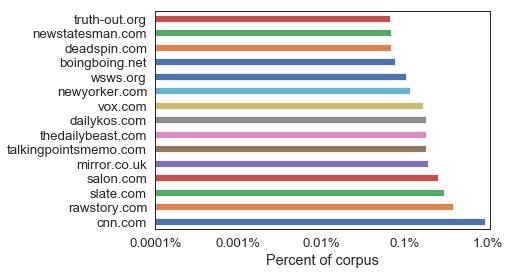

In [29]:
subdf = urls.loc[urls['bias'] == 'left']
ax = ((subdf.domain.value_counts() / urls.shape[0]) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.0001, 0.001, 0.01, 0.1, 1])
ax.set_xticklabels(["0.0001%", "0.001%", "0.01%", "0.1%", "1.0%"])
ax.set_xlabel("Percent of corpus")

Text(0.5,0,'Percent of corpus')

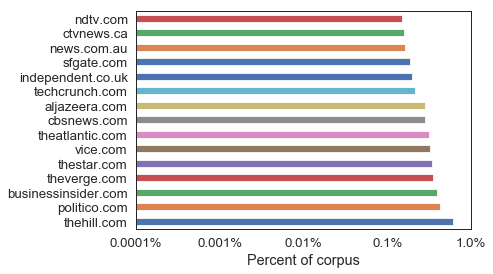

In [30]:
subdf = urls.loc[urls['bias'] == 'left-center']
ax = ((subdf.domain.value_counts() / urls.shape[0]) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.0001, 0.001, 0.01, 0.1, 1])
ax.set_xticklabels(["0.0001%", "0.001%", "0.01%", "0.1%", "1.0%"])
ax.set_xlabel("Percent of corpus")

In [72]:
url_pop = urls.domain.value_counts()
url_pop = url_pop.reset_index()
url_pop.columns = ['domain', '# of Documents']

In [73]:
url_pop = url_pop.merge(urls[['domain', 'bias', 'fact']], on='domain').drop_duplicates(subset=['domain'])

In [74]:
url_pop = url_pop.reset_index()

In [ ]:
subsample_preds = pd.read_json("data/subsample.preds.k.5", lines=True)

In [ ]:
subsample_preds.columns

In [ ]:
z = subsample_preds.groupby('domain').progress_apply(lambda x: x.bias_label.value_counts()).reset_index()



In [235]:
z.columns = ['domain', 'label', 'num']

In [236]:
domains = z.loc[z.num > 1]['domain']

q = subsample_preds.loc[subsample_preds.domain.isin(domains)].groupby('domain')['__label__right_prob'].max().reset_index()

In [75]:
url_pop_master = url_pop

In [76]:
url_pop_master['Factual Reliability'] = url_pop_master['fact']

In [64]:
def bucket(x):
    if x == 'extreme-left':
        return 4
    if x == 'left':
        return 3
    if x == 'left-center':
        return 2
    if x == 'center':
        return 1
    if x == 'right-center':
        return 2
    if x == 'right':
        return 3
    if x == 'extreme-right':
        return 4
    if x == 'LOW':
        return 1
    if x == "MIXED":
        return 2
    if x == "HIGH":
        return 3

In [78]:
url_pop_master['Political Bias'] = url_pop_master.bias.apply(bucket)

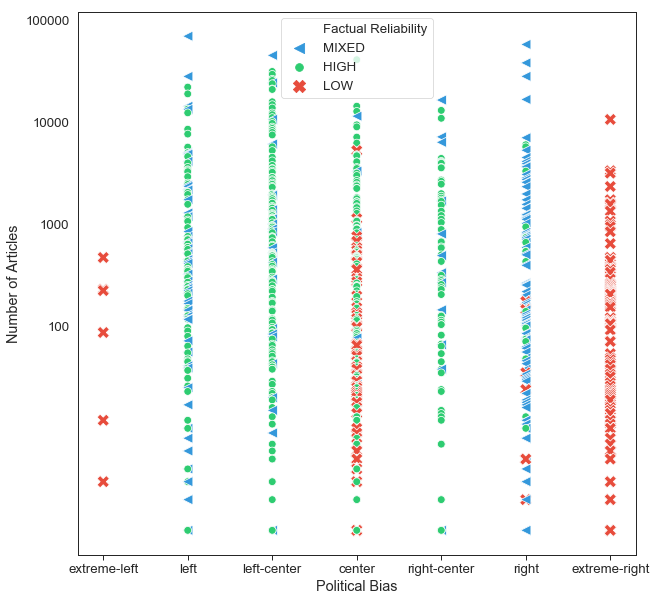

In [79]:
fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=url_pop_master.dropna(), x="Political Bias",y="# of Documents", hue="Factual Reliability", style='Factual Reliability', size='Factual Reliability', size_order=['LOW', 'MIXED', 'HIGH'], markers = {"LOW": "X", "MIXED": "<", "HIGH": "o"}, style_order=['LOW', 'MIXED', 'HIGH'], sizes=(60, 150), palette = ["#3498db","#2ecc71", "#e74c3c" ])
ax.set_yscale('log')
ax.set_ylabel("Number of Articles")
ax.set_yticks([100, 1000, 10000, 100000])
ax.set_yticklabels([100, 1000, 10000, 100000])
ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(["extreme-left", "left", "left-center", "center", "right-center", "right", "extreme-right"])
ax.xaxis.tick_bottom()


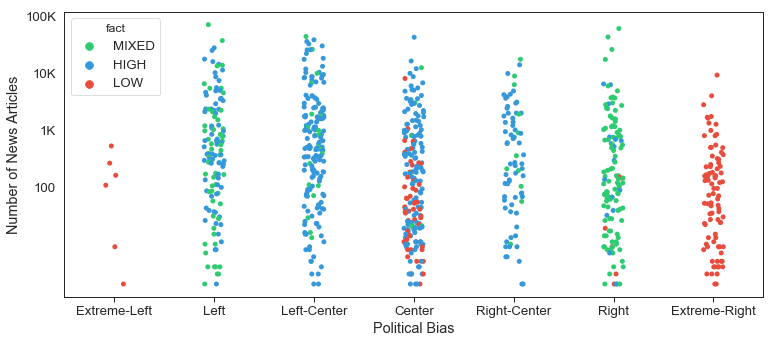

In [256]:
fig = plt.figure(figsize=(11,5))
palette = sns.color_palette(["#2ecc71","#3498db", "#e74c3c" ])

sns.set(context="paper", style="white", font_scale=1.5, palette=palette, color_codes=False) 
ax = sns.stripplot(data=site_biases.dropna(), x="bias_numeric", size=5, y="# of Documents", hue="fact",  jitter=0.1)
ax.set_yscale('log')
ax.set_xlabel("Political Bias")
ax.set_ylabel("Number of News Articles")
ax.set_yticks([100, 1000, 10000, 100000])
ax.set_yticklabels([100, "1K", "10K", "100K"])
ax.set_xticks([0,1, 2, 3, 4, 5, 6])
ax.set_xticklabels(["Extreme-Left", "Left", "Left-Center", "Center", "Right-Center", "Right", "Extreme-Right"])

ax.xaxis.tick_bottom()
plt.tight_layout()
plt.savefig("news_bias.pdf", dpi=300)

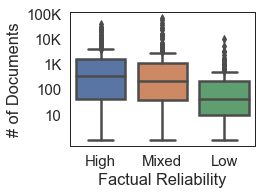

In [171]:
fig, axes = plt.subplots(1,1, figsize=(4,3))
sns.set(context="paper", style="white", font_scale=1.7)
sns.boxplot(data=url_pop_master.dropna(), x='Factual Reliability', y='# of Documents', order=["HIGH", "MIXED", "LOW"], linewidth=2.5, ax=axes)
axes.set_yscale('log')
axes.set_yticks([10,100, 1000, 10000, 100000])
axes.set_yticklabels([10, 100, "1K", "10K", "100K"])
axes.set_xticklabels(["High", "Mixed", "Low"])


# low_df = (urls.loc[urls['fact'] == 'LOW'].domain.value_counts()).head(n=10).reset_index()
# low_df.columns = ['Domain', "Number of Documents"]
# data = low_df.sort_values(by='Number of Documents', ascending=True)
# sns.barplot(data=data, x='Number of Documents', y='Domain', palette=sns.cubehelix_palette(10, start=.5, rot=-.75, reverse=False), ax=axes[1])
# axes[1].set_xscale('log')
# axes[1].set_xlim([0, 10000])
# axes[1].set_xticks([100, 1000, 10000])
# axes[1].set_xticklabels(["100", "1K", "10K"])
plt.tight_layout()
plt.savefig("fact.pdf", dpi=300)

In [251]:
url_pop_master['Political Bias'].value_counts(normalize=True)

3.0    0.266509
4.0    0.202830
2.0    0.198113
6.0    0.148585
5.0    0.106132
7.0    0.073113
1.0    0.004717
Name: Political Bias, dtype: float64

In [252]:
26.6 + 20.2 + 19.8

66.6

In [250]:
url_pop_master.dropna().fact.value_counts().sum()

424

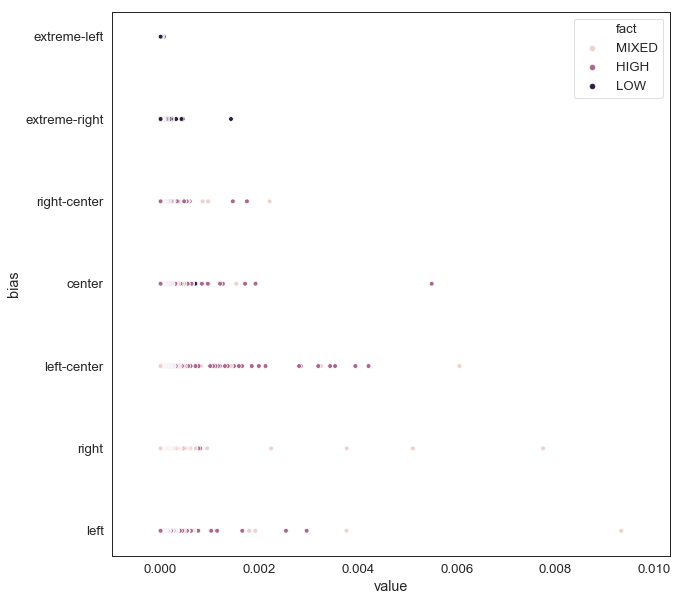

In [231]:
url_pop.dropna()
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=url_pop, x="value",y="bias", hue="fact", palette=sns.cubehelix_palette(3))
plt.savefig("test_bias.pdf", dpi=300)

### Fake News Analysis

[Text(0,0,'High'), Text(0,0,'Mixed'), Text(0,0,'Low')]

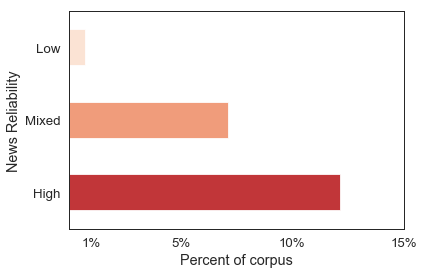

In [219]:
ax = ((urls.fact.value_counts() / urls.shape[0]) * 100).head(n=15).plot(kind='barh')
ax.set_xticks([1, 5, 10, 15])
ax.set_xticklabels(["1%", "5%", "10%", "15%"])
ax.set_xlabel("Percent of corpus")
ax.set_ylabel("News Reliability")
ax.set_yticklabels(["Low", "Mixed", "High"][::-1])

Text(0.5,0,'Percent of corpus')

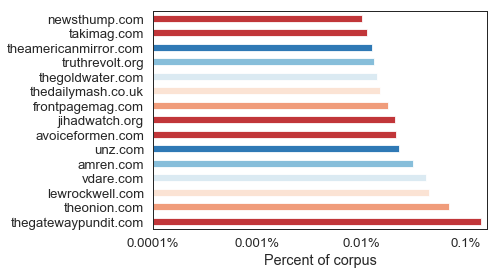

In [206]:
subdf = urls.loc[urls['fact'] == 'LOW']
ax = ((subdf.domain.value_counts() / urls.shape[0]) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.0001, 0.001, 0.01, 0.1])
ax.set_xticklabels(["0.0001%", "0.001%", "0.01%", "0.1%"])
ax.set_xlabel("Percent of corpus")

Text(0.5,0,'Percent of corpus')

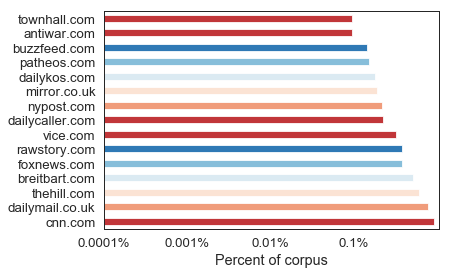

In [208]:
subdf = urls.loc[urls['fact'] == 'MIXED']
ax = ((subdf.domain.value_counts() / urls.shape[0]) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.0001, 0.001, 0.01, 0.1])
ax.set_xticklabels(["0.0001%", "0.001%", "0.01%", "0.1%"])
ax.set_xlabel("Percent of corpus")

Text(0.5,0,'Percent of corpus')

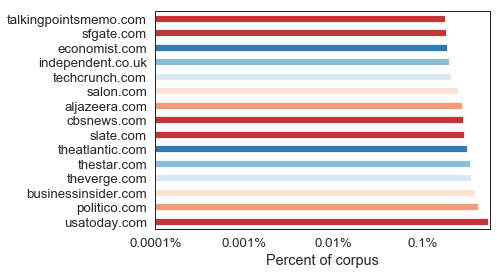

In [220]:
subdf = urls.loc[urls['fact'] == 'HIGH']
ax = ((subdf.domain.value_counts() / urls.shape[0]) * 100).head(n=15).plot(kind='barh')
ax.set_xscale('log')
ax.set_xticks([0.0001, 0.001, 0.01, 0.1])
ax.set_xticklabels(["0.0001%", "0.001%", "0.01%", "0.1%"])
ax.set_xlabel("Percent of corpus")

In [396]:
urls_master = master.merge(urls, on='filename')
urls_master['Political Bias'] = urls_master.bias.apply(bucket)
urls_master['Factual Reliability'] = urls_master.fact.apply(bucket)

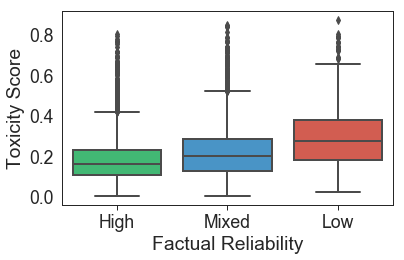

In [387]:
pal = sns.color_palette(["#2ecc71","#3498db", "#e74c3c" ])
sns.set(context="paper", style="white", font_scale=2.0, palette=pal,color_codes=False) 
ax = sns.boxplot(data=urls_master,x='fact', y='Toxicity Score', linewidth=2, palette=pal)
ax.set_xticklabels(["High", "Mixed", "Low"])
ax.set_xlabel("Factual Reliability")
ax.xaxis.tick_bottom()
plt.tight_layout()
plt.savefig("factual_reliability_toxicity.pdf", dpi=300)

In [407]:
score_cols = [x for x in urls_master.columns if "Score" in x]
urls_master[['Factual Reliability'] + score_cols].corr(method='spearman')


,Factual Reliability,Insult Score,Severe Toxicity Score,Toxicity Score,Profanity Score,Sexually Explicit Score,Flirtation Score,Identity Attack Score,Threat Score,Average Toxicity Score
Factual Reliability,1.000000,-0.208337,-0.171811,-0.196927,-0.185072,-0.109036,-0.080948,-0.190608,-0.147705,-0.189023
Insult Score,-0.208337,1.000000,0.910244,0.910282,0.948409,0.631268,0.519131,0.848223,0.679970,0.934641
Severe Toxicity Score,-0.171811,0.910244,1.000000,0.922049,0.947534,0.737359,0.669296,0.742682,0.749912,0.958354
Toxicity Score,-0.196927,0.910282,0.922049,1.000000,0.896452,0.590851,0.513145,0.729390,0.646095,0.871191
Profanity Score,-0.185072,0.948409,0.947534,0.896452,1.000000,0.736706,0.632540,0.726057,0.685737,0.945525
Sexually Explicit Score,-0.109036,0.631268,0.737359,0.590851,0.736706,1.000000,0.788468,0.473021,0.550580,0.779347
Flirtation Score,-0.080948,0.519131,0.669296,0.513145,0.632540,0.788468,1.000000,0.325076,0.501561,0.685984
Identity Attack Score,-0.190608,0.848223,0.742682,0.729390,0.726057,0.473021,0.325076,1.000000,0.668111,0.823490
Threat Score,-0.147705,0.679970,0.749912,0.646095,0.685737,0.550580,0.501561,0.668111,1.000000,0.807839
Average Toxicity Score,-0.189023,0.934641,0.958354,0.871191,0.945525,0.779347,0.685984,0.823490,0.807839,1.000000


In [414]:
np.std([-0.21, -0.17, -0.20 , -0.19, -0.11, -0.08, -0.19, -0.15])

0.043229041164476456

In [410]:
urls_master[['Political Bias'] + score_cols].dropna().corr(method='spearman')

,Political Bias,Insult Score,Severe Toxicity Score,Toxicity Score,Profanity Score,Sexually Explicit Score,Flirtation Score,Identity Attack Score,Threat Score,Average Toxicity Score
Political Bias,1.000000,0.015734,0.026733,0.015630,0.009292,0.020898,0.035526,0.030677,0.056164,0.032200
Insult Score,0.015734,1.000000,0.910193,0.897543,0.951546,0.605325,0.545202,0.836687,0.630564,0.930757
Severe Toxicity Score,0.026733,0.910193,1.000000,0.912115,0.942602,0.706394,0.672484,0.761598,0.746520,0.964521
Toxicity Score,0.015630,0.897543,0.912115,1.000000,0.886029,0.550595,0.537449,0.714018,0.618907,0.861319
Profanity Score,0.009292,0.951546,0.942602,0.886029,1.000000,0.711264,0.638245,0.724940,0.656064,0.943524
Sexually Explicit Score,0.020898,0.605325,0.706394,0.550595,0.711264,1.000000,0.773942,0.440947,0.512754,0.751592
Flirtation Score,0.035526,0.545202,0.672484,0.537449,0.638245,0.773942,1.000000,0.338131,0.509640,0.694375
Identity Attack Score,0.030677,0.836687,0.761598,0.714018,0.724940,0.440947,0.338131,1.000000,0.635519,0.823923
Threat Score,0.056164,0.630564,0.746520,0.618907,0.656064,0.512754,0.509640,0.635519,1.000000,0.787793
Average Toxicity Score,0.032200,0.930757,0.964521,0.861319,0.943524,0.751592,0.694375,0.823923,0.787793,1.000000


In [412]:
np.mean([0.02, 0.03, 0.02 , 0.01, 0.02, 0.04, 0.03, 0.06])

0.014523687548277812

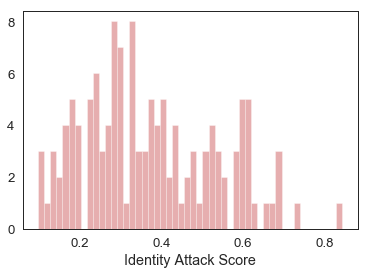

In [79]:
sns.distplot(urls_master.loc[urls_master.domain == 'thegatewaypundit.com']['Identity Attack Score'], kde=False, bins=50)

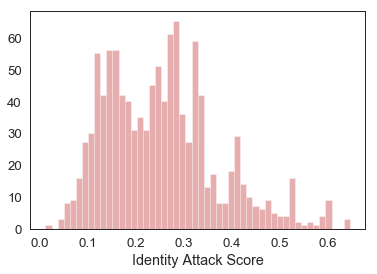

In [81]:
sns.distplot(urls_master.loc[urls_master.domain == 'nytimes.com']['Identity Attack Score'], kde=False, bins=50)

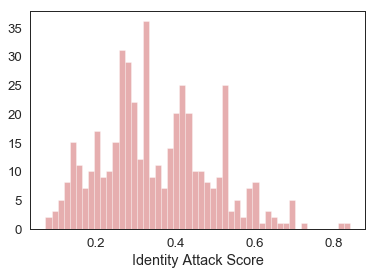

In [82]:
sns.distplot(urls_master.loc[urls_master.domain == 'breitbart.com']['Identity Attack Score'], kde=False, bins=50)